# Importanto bibliotecas e definindo as funções 

In [37]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

def ChebyshevFilter(w, n, wc, e):
    #note que a variável values calcula os coeficientes de Chebyshev tal como a função calcula_coeficientes o faria
    values = np.piecewise(
        w,
        [(0 <= w) & (w <= wc), (w > wc)],
        [lambda f: np.cos(n*np.arccos(f/wc)), lambda f: np.cosh(n*np.arccosh(f/wc))]
        )

    values = (e**2)*(values**2) + 1
    Hc = 1/np.sqrt(values)

    return Hc

def ButterworthFilter(w, n, wc):
    values = w.copy()

    values = (values/wc)**(2*n) + 1
    Hb = 1/np.sqrt(values)

    return Hb

def IdealFilter(w, wc):
    Hi = np.piecewise(
        w,
        [(np.abs(w) <= wc), (np.abs(w) > wc)],
        [1, 0]
        )

    return Hi

def rectangleFourierTransform(w, tau):
    return tau*np.sinc((tau*w)/(2*pi))


def plotFunctions(xAxisValues, xAxisTitle, yAxisTitle, graphTitle, *function_color_label):
    plt.title(graphTitle)
    plt.xlabel(xAxisTitle)
    plt.ylabel(yAxisTitle)

    for function, color, label in function_color_label:
        plt.plot(xAxisValues, function, label = label, color = color)
    
    plt.legend()
    plt.show()
        


# Item a

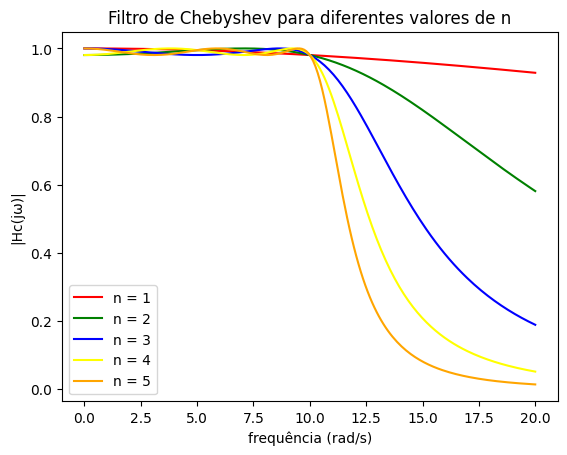

In [38]:
wc = 10
e = 0.2
frequencies = np.linspace(0, 20, 200)
plotFunctions(frequencies ,"frequência (rad/s)", "|Hc(jω)|", "Filtro de Chebyshev para diferentes valores de n",
              (ChebyshevFilter(frequencies, 1, wc, e), "red", "n = 1"),
              (ChebyshevFilter(frequencies, 2, wc, e), "green", "n = 2"),
              (ChebyshevFilter(frequencies, 3, wc, e), "blue", "n = 3"),
              (ChebyshevFilter(frequencies, 4, wc, e), "yellow", "n = 4"),
              (ChebyshevFilter(frequencies, 5, wc, e), "orange", "n = 5"))

# Item b

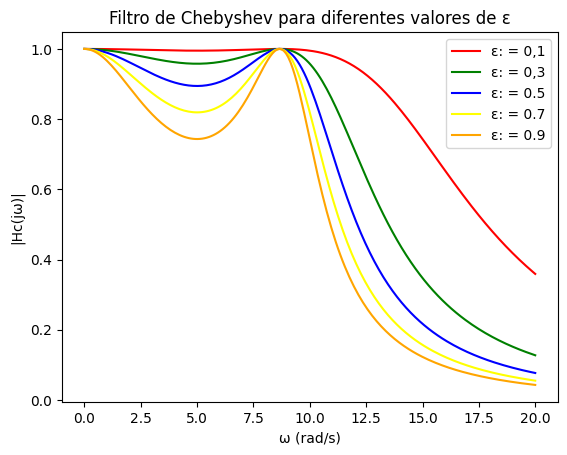

In [39]:
#quanto maior o valor de ε, mais ondulação na banda de passagem do sinal, porem a queda após o corte é mais abrupta
wc = 10
n = 3
frequencies = np.linspace(0, 20, 200)
plotFunctions(frequencies ,"ω (rad/s)", "|Hc(jω)|", "Filtro de Chebyshev para diferentes valores de ε",
              (ChebyshevFilter(frequencies, n, wc, 0.1), "red", "ε: = 0,1"),
              (ChebyshevFilter(frequencies, n, wc, 0.3), "green", "ε: = 0,3"),
              (ChebyshevFilter(frequencies, n, wc, 0.5), "blue", "ε: = 0.5"),
              (ChebyshevFilter(frequencies, n, wc, 0.7), "yellow", "ε: = 0.7"),
              (ChebyshevFilter(frequencies, n, wc, 0.9), "orange", "ε: = 0.9"))

# Item c

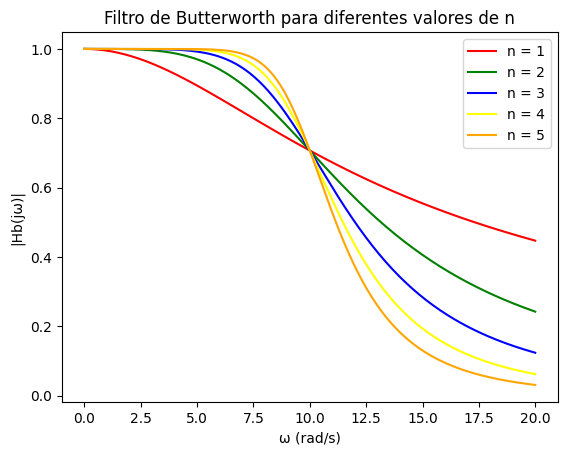

In [40]:
wc = 10
frequencies = np.linspace(0, 20, 200)
plotFunctions(frequencies, "ω (rad/s)", "|Hb(jω)|", "Filtro de Butterworth para diferentes valores de n",
              (ButterworthFilter(frequencies, 1, wc), "red", "n = 1"),
              (ButterworthFilter(frequencies, 2, wc), "green", "n = 2"),
              (ButterworthFilter(frequencies, 3, wc), "blue", "n = 3"),
              (ButterworthFilter(frequencies, 4, wc), "yellow", "n = 4"),
              (ButterworthFilter(frequencies, 5, wc), "orange", "n = 5"))

# Item d

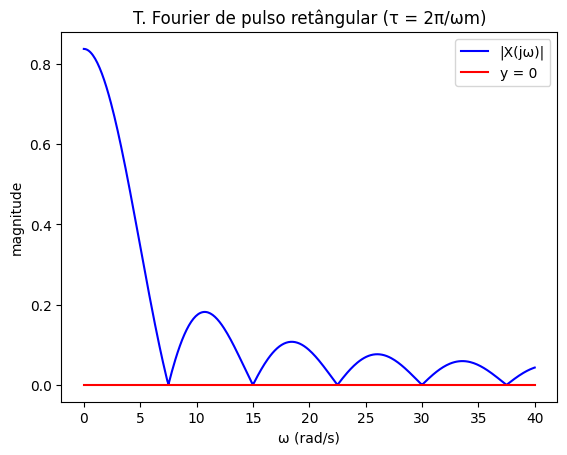

In [41]:
frequencies = np.linspace(0, 40, 400)
wm = 7.5
tau = 2*pi/wm
X = np.abs(rectangleFourierTransform(frequencies, tau))

plotFunctions(frequencies, "ω (rad/s)", "magnitude", "T. Fourier de pulso retângular (τ = 2π/ωm)",
              (X, "blue", "|X(jω)|"),
              (np.zeros_like(frequencies), "red", "y = 0"))                                     #linha horizontal em y = 0

# Item e

gráfico dos filtros

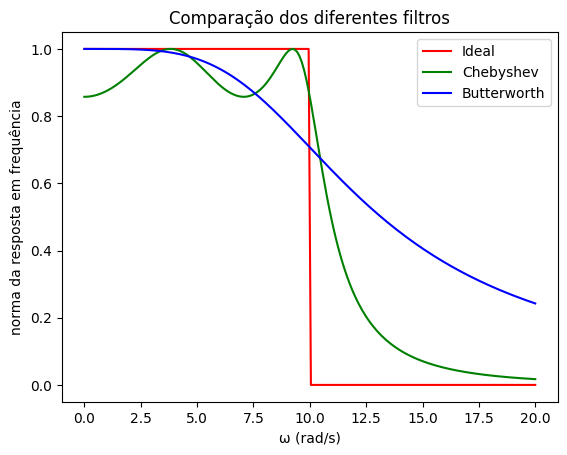

In [42]:
frequencies = np.linspace(0, 20, 200)
wc = 10
nc = 4
e = 0.6
nb = 2

plotFunctions(frequencies, "ω (rad/s)", "norma da resposta em frequência", "Comparação dos diferentes filtros",
              (IdealFilter(frequencies, wc), "red", "Ideal"),
              (ChebyshevFilter(frequencies, nc, wc, e), "green", "Chebyshev"),
              (ButterworthFilter(frequencies, nb, wc), "blue", "Butterworth"))

aplicação dos filtros na transformada do retângulo

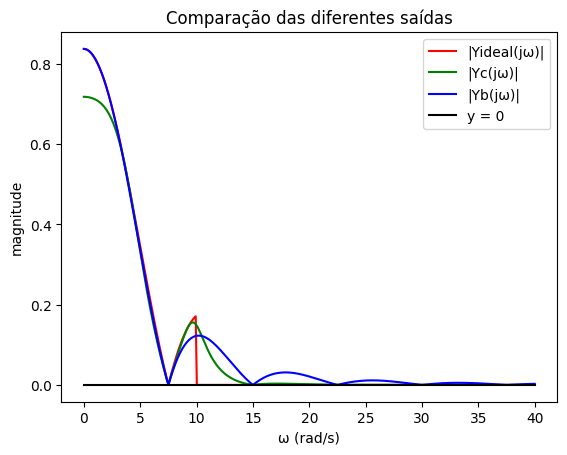

In [43]:
frequencies = np.linspace(0, 40, 400)

plotFunctions(frequencies, "ω (rad/s)", "magnitude", "Comparação das diferentes saídas",
              (IdealFilter(frequencies, wc)*X, "red", "|Yideal(jω)|"),
              (ChebyshevFilter(frequencies, nc, wc, e)*X, "green", "|Yc(jω)|"),
              (ButterworthFilter(frequencies, nb, wc)*X, "blue", "|Yb(jω)|"),
              (np.zeros_like(frequencies), "black", "y = 0"))